# Welcome to My END-TO-END ML Model🥇❤️
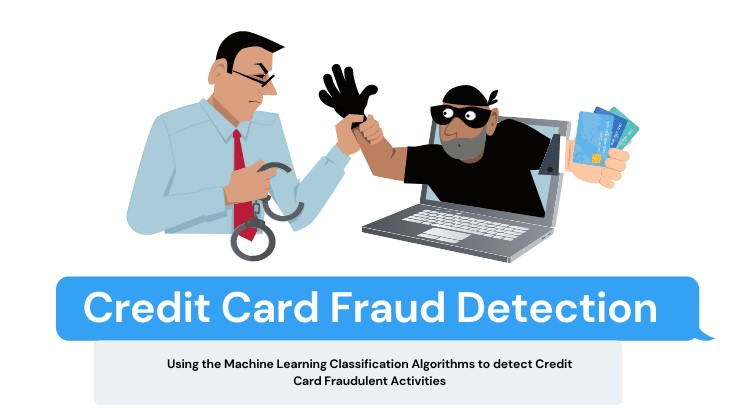

In [46]:
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings

In [2]:
warnings.filterwarnings("ignore")

# In this Notebook i will cover ML  Concepts 
---------------------------------
## 1-Data Concepts📝 
 *  Data Wrangling (Munging)
 *  Data Acquisition
 * Feature Engineering
 * Data Enrichment
## 2-Model Concepts📁
 * Modeling Hyperparameters:
   Learning Rate ∝, Regularization lambda λ, Grid Search / Pipeline, K in CV-fold
 * Fitting: Overfit (low train error / high val) i solve with >  Increase Regularization,Reduce Complexity, More Data, Less Features, Proper Training Stop 
- Bias: Due to model assumptions
- Variance: Due to model's
  sensitivity to data changes
- Practically: Test set / Regularize
  Hyperparameter Tuning
## 3- Data Issues❗
 * Imbalanced DataSet
 * Data Leakage
 * Distribution Shift
 
----------------------------------------------------------
----------------------------------------------------------
# KEY POINTS FOR END-TO-END MODEL📍:
#### [1-Define the Problem](#DefinetheProblemorResearchQuestion)
#### [2-Data Acquisition:](#DataAcquisition)
#### [3- Basic Data Cleaning](#BasicDataCleaning)
#### [4-Exploratory Data Analysis (EDA)](#ExploratoryDataAnalysis(EDA))
#### [5-Advanced Data Cleaning and Preprocessing](#AdvancedDataCleaningand)
#### [6-Data Transformation](#DataTransformation)
#### [7-Feature Engineering](#FeatureEngineering)
#### [8-Handling Imbalanced Data](#HandlingImbalancedData)
#### [9-Splitting Data](#SplittingData)
#### [10- Model Selection](#ModelSelection)
#### [11-Model Training](#ModelTraining:)
#### [12-Hyperparameter Tuning](#HyperparameterTuning)
#### [13-Model Evaluation](#ModelEvaluation)
#### [14-Model Improvement](#ModelImprovement)
#### [15- Final Model and Deployment](#FinalModelandDeployment)
#### [16-Monitor and Maintain the Model](#MonitorandMaintaintheModel)


<a id='DefinetheProblemorResearchQuestion'></a>

# 1-Define the Problem

   * Understand the objective: Clearly define the problem you're solving (e.g., classification, regression, clustering).
   * Understand the business context: What are the key metrics and goals? Who will use the model?

<a id='DataAcquisition'></a>

#  2-Data Acquisition:

In [3]:
data=pd.read_csv('creditcardproject')

In [4]:
data.shape

(284807, 31)

In [5]:
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<a id='BasicDataCleaning'></a>

# 3- Basic Data Cleaning
a. Handle Missing Data

In [8]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### we ensure that there is no missing values✅

##### b-Removing Duplicates

In [9]:
print(data.duplicated().sum())

1081


In [10]:
duplicates = data.duplicated()
# Get the indices of duplicated rows
duplicate_indices = data[duplicates].index
print("Indices of duplicated rows:", duplicate_indices)

Indices of duplicated rows: Int64Index([    33,     35,    113,    114,    115,    221,    223,   1178,
              1180,   1382,
            ...
            282210, 282211, 282212, 282213, 282985, 282987, 283483, 283485,
            284191, 284193],
           dtype='int64', length=1081)


In [11]:
data= data.drop_duplicates()

In [12]:
data.shape # after removing 1081 row

(283726, 31)

<a id='ExploratoryDataAnalysis(EDA)'></a>

# 4-Exploratory Data Analysis (EDA)📊

### 1-Descriptive statistics📈


In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### 2-Univariate analysis🔎
* note in this dataset these 2 feature(Amount ,Time) are not PCA-transformed, so i will focus on analysing them .

### Distribution of Amount and Time

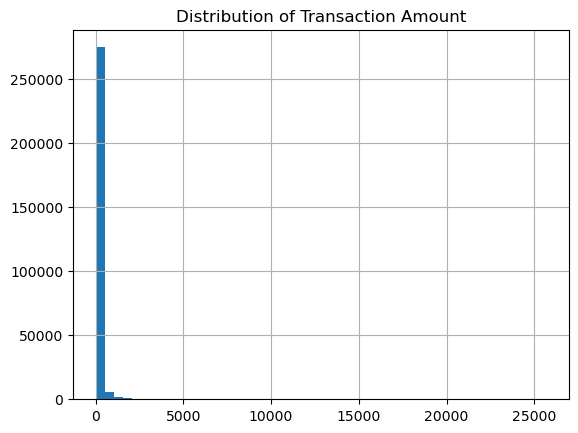

Text(0.5, 1.0, 'Distribution of Transaction Time')

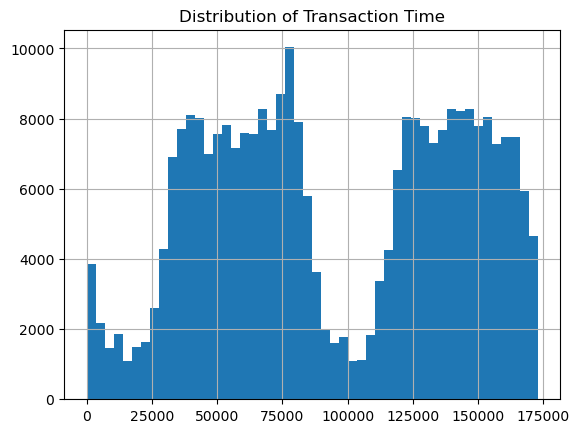

In [14]:
data['Amount'].hist(bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

data['Time'].hist(bins=50)
plt.title('Distribution of Transaction Time')

### check the distribution of the target variable (Class):

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

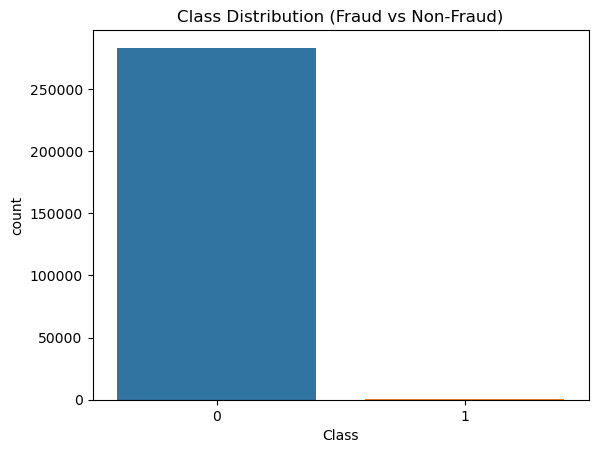

In [15]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

### Detect  outliers in Amount &Time

Text(0.5, 1.0, 'Box Plot for Transaction Time')

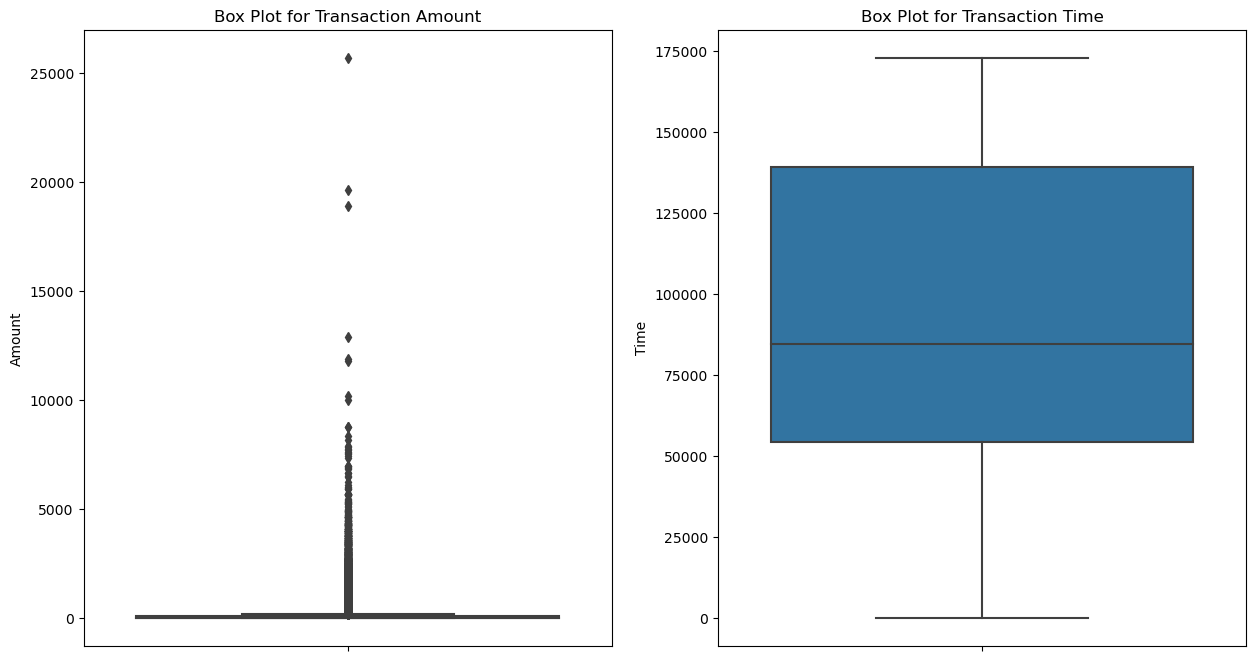

In [16]:
# Create box plots for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.boxplot(y='Amount', data=data, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=data, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

### time distribution between fraudulent and non-fraudulent transactions

Text(0.5, 1.0, 'Transaction Time by Class')

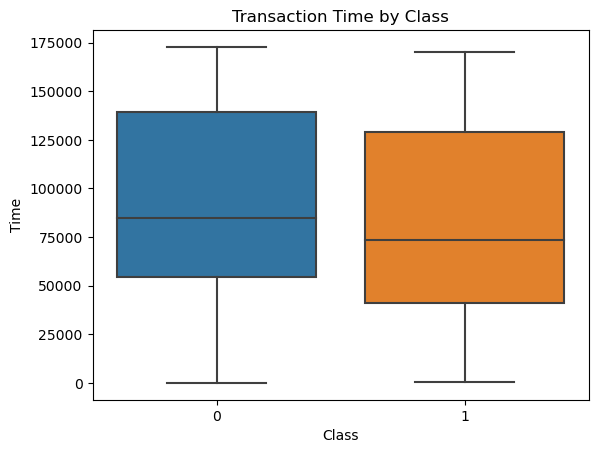

In [17]:
sns.boxplot(x='Class', y='Time', data=data)
plt.title("Transaction Time by Class")

### Distribution of all columns

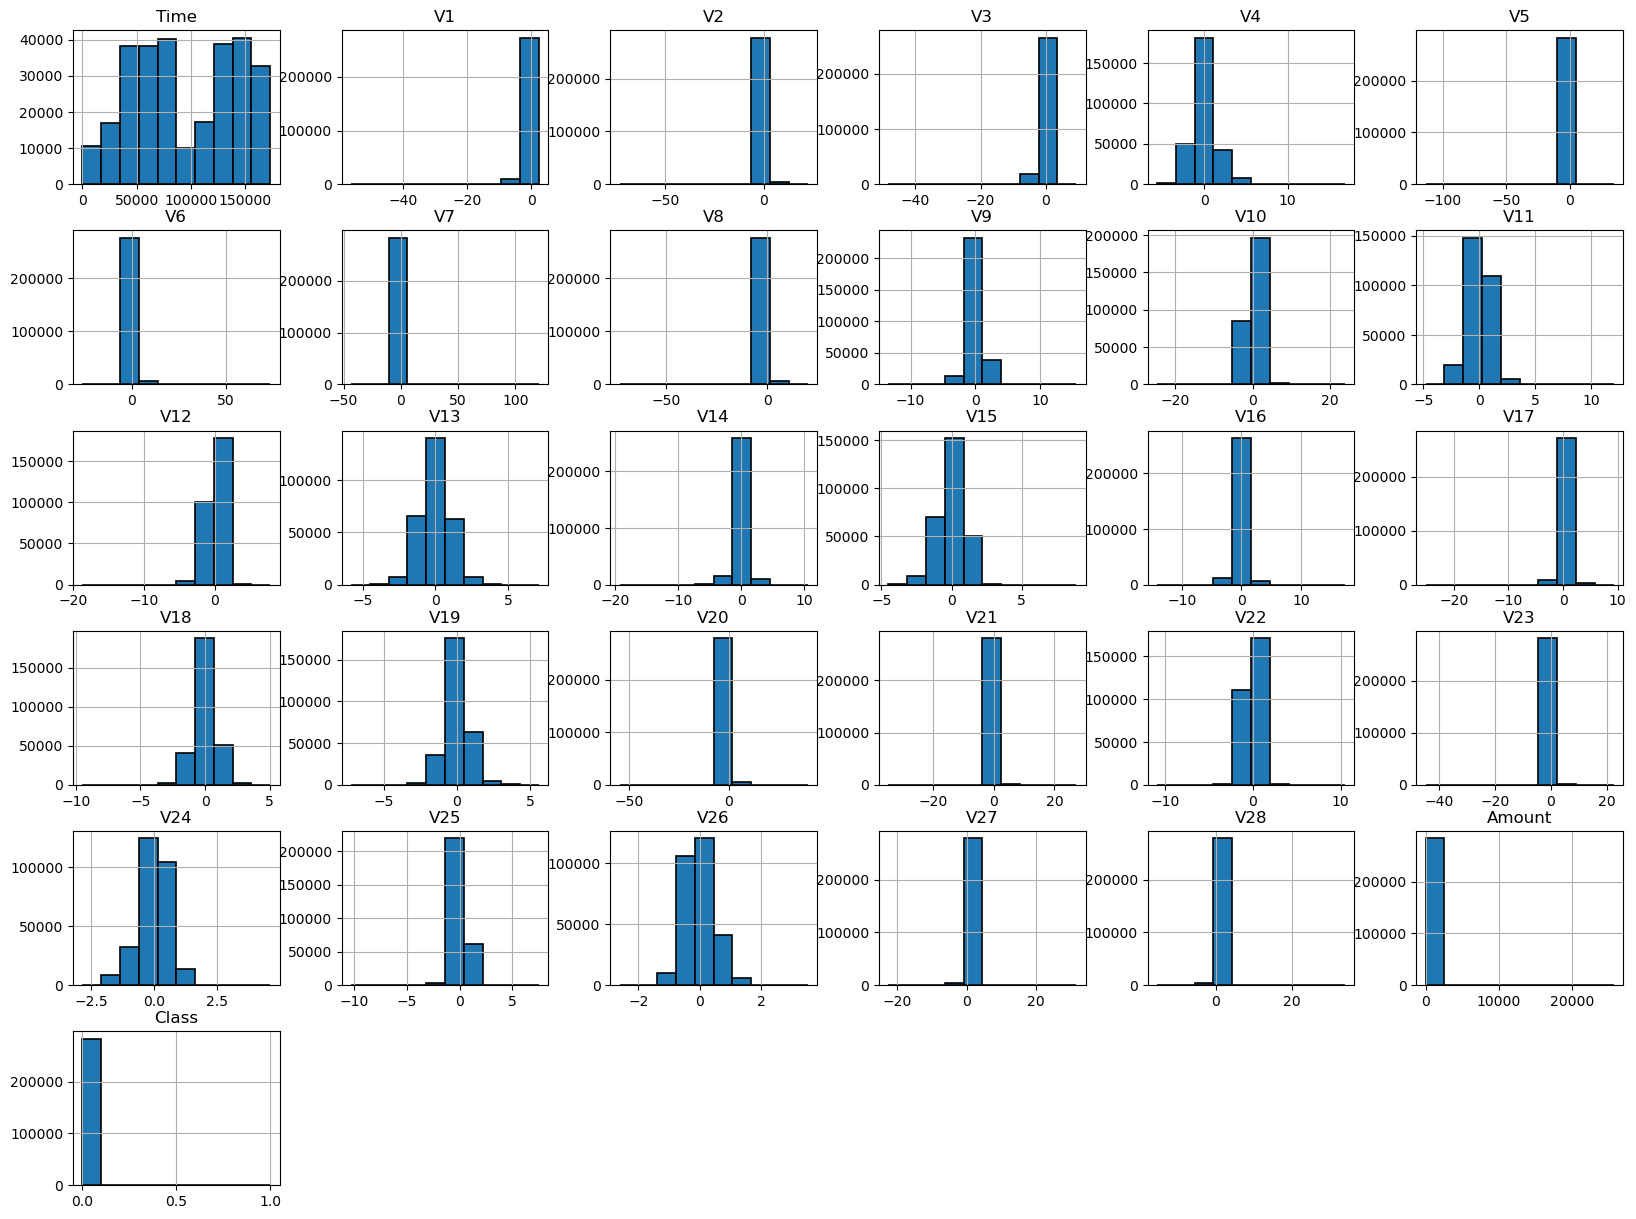

In [18]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

# 3-Bivariate Analysis📈

### How the transaction amount differs between fraudulent and non-fraudulent transactions.

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

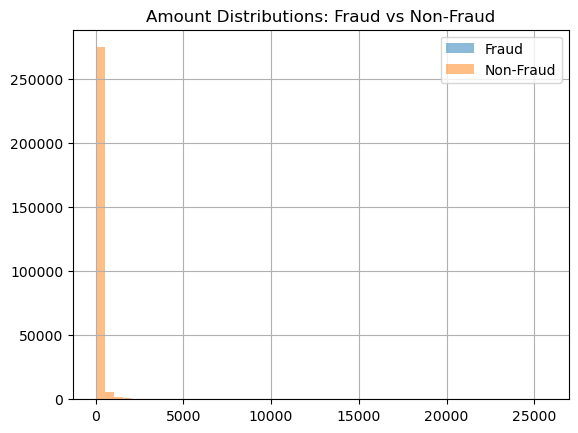

In [19]:
fraud =data[data['Class'] == 1]
non_fraud =data[data['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')

 ### check if fraud transactions happen more frequently at specific times.

Text(0.5, 1.0, 'Time Distributions: Fraud vs Non-Fraud')

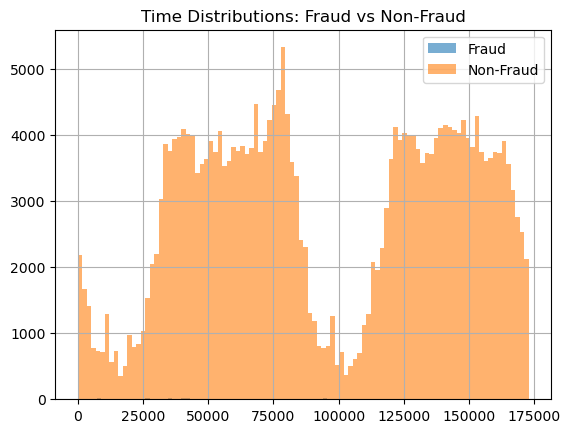

In [20]:
fraud['Time'].hist(alpha=0.6, label='Fraud', bins=100)
non_fraud['Time'].hist(alpha=0.6, label='Non-Fraud', bins=100)
plt.legend()
plt.title('Time Distributions: Fraud vs Non-Fraud')

### how pairs of PCA features behave:

Text(0.5, 1.0, 'Scatter plot between V1 and V2 (colored by Class)')

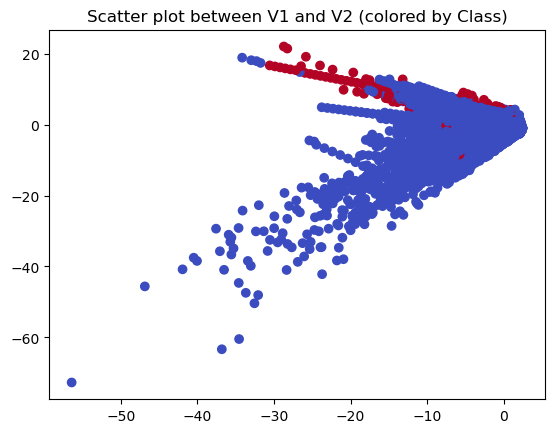

In [21]:
plt.scatter(data['V1'], data['V2'], c=data['Class'], cmap='coolwarm')
plt.title('Scatter plot between V1 and V2 (colored by Class)')

Text(0.5, 1.0, 'Correlation Matrix of Features')

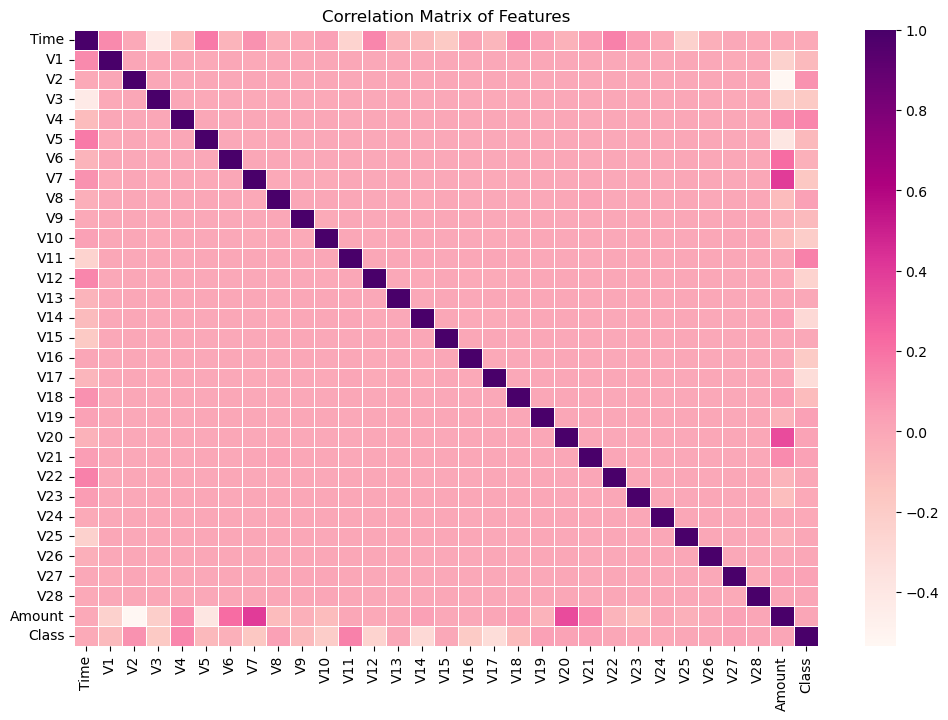

In [22]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

# 4-Multivariate Analysis📊

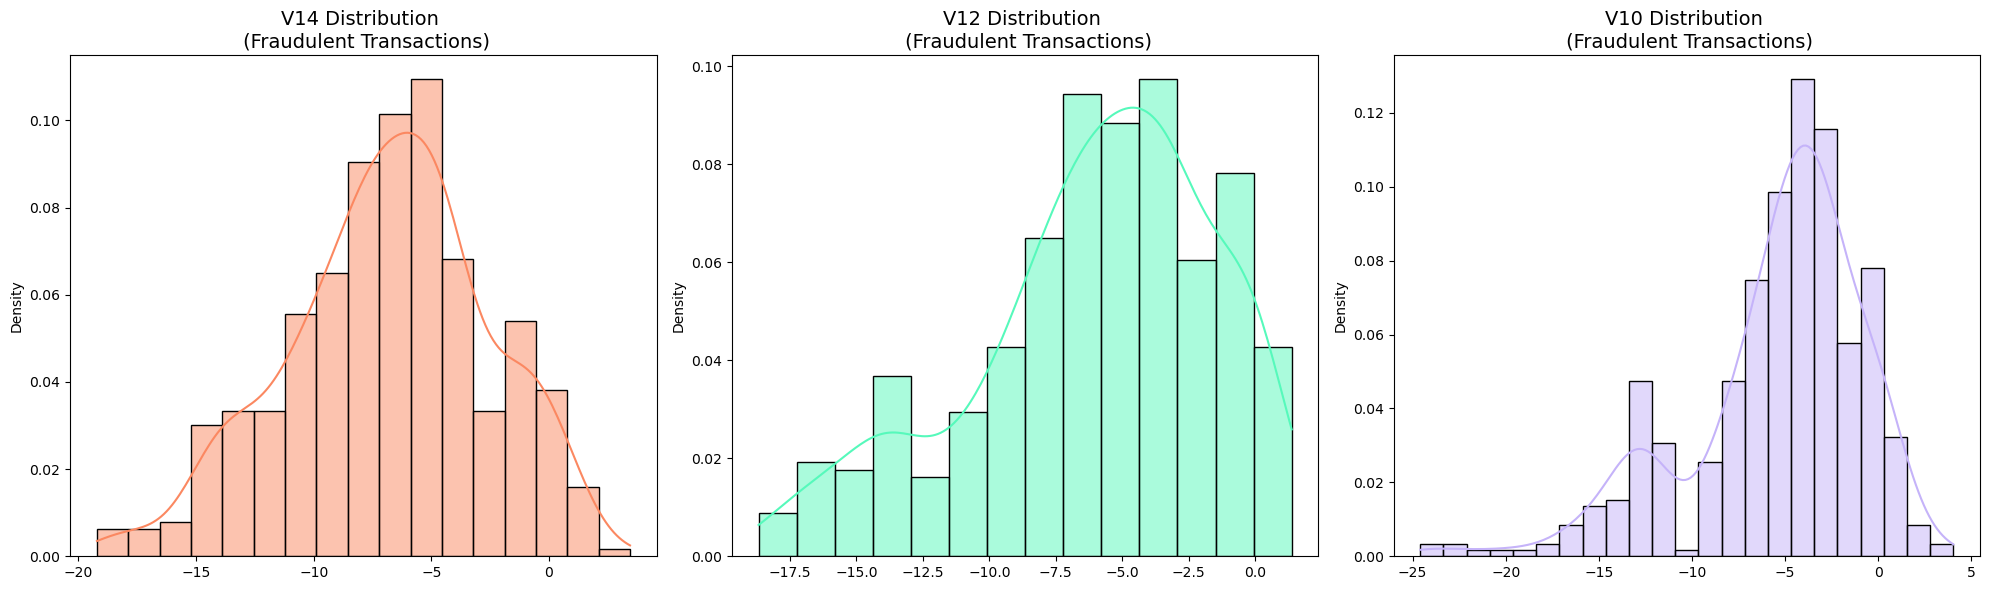

In [23]:
# Set up the subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values  
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraudulent Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values  
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V12 Distribution \n (Fraudulent Transactions)', fontsize=14)

v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values 
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V10 Distribution \n (Fraudulent Transactions)', fontsize=14)
plt.tight_layout()

### Visualize the relationships between three PCA features and the target.

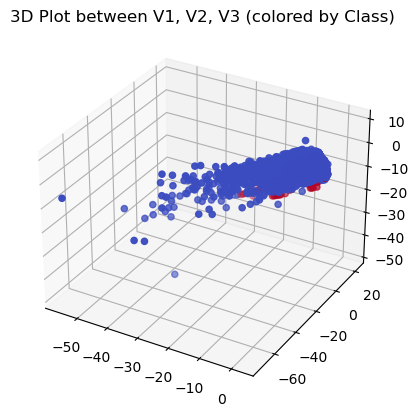

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['V1'], data['V2'], data['V3'], c=data['Class'], cmap='coolwarm')
plt.title('3D Plot between V1, V2, V3 (colored by Class)')
plt.show()

<a id='AdvancedDataCleaningand'></a>

# 5-Advanced Data Cleaning and Preprocessing

## 1-Handle outliers

In [25]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

Text(0.5, 1.0, 'Box Plot for Transaction Time')

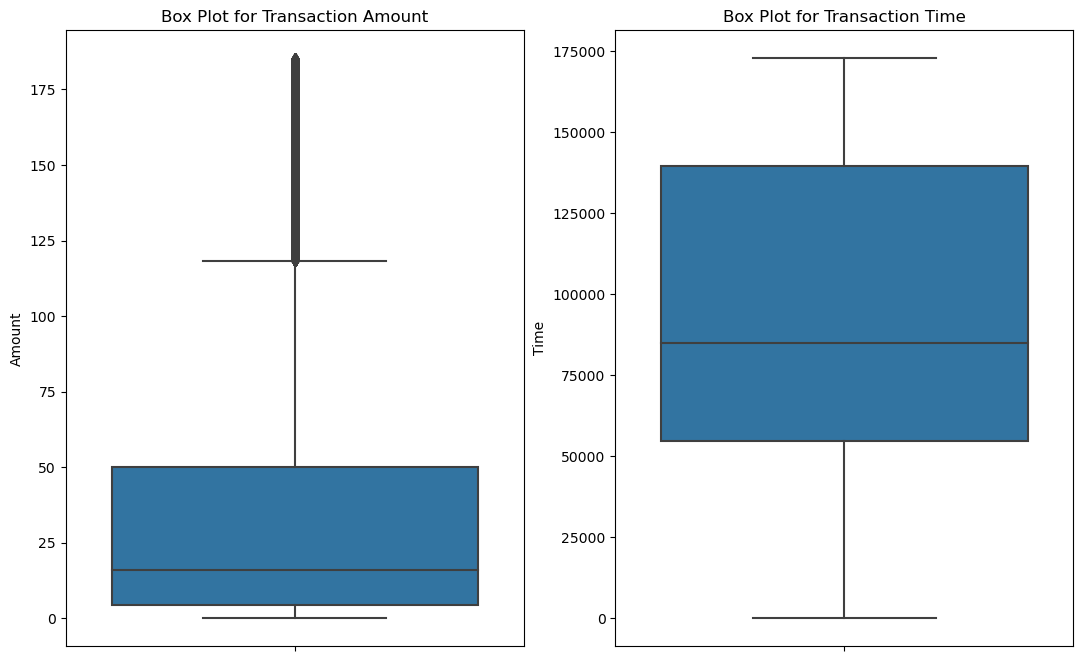

In [26]:
# Create box plots for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(13, 8))
sns.boxplot(y='Amount', data=df_clean, ax=ax[0])
ax[0].set_title('Box Plot for Transaction Amount')
sns.boxplot(y='Time', data=df_clean, ax=ax[1])
ax[1].set_title('Box Plot for Transaction Time')

# 📌NOTE!!!! 
## After i remove outliers from Amount  Feature i realize that is not correct !
#### >> fraudulent transactions are inherently rare and often appear as outliers in the data (unusually large or small transaction amounts), Removing these outliers could result in losing critical data points that are important for identifying fraud ,as ths dataset is highly imbalanced keeping outliers might help the model capture this minority class better.


#### >> i also think Removing Outliers from Amount in Non-Fraudulent Transactions: but this will make a big trouble! because this will lead to (Data Leakage) because I'LL remove non-fraudulent outliers based on information that may not be available in real-world scenarios so the best Senario is keepint these Outliers and i will work on data not df_clean.

<a id='DataTransformation'></a>

# 6-Data Transformation

## 1-Log Transformation

In [27]:
features_to_scale=['Amount']
data['Amount'] = np.log(data['Amount'] + 1)

In [28]:
data.shape

(283726, 31)

## 2-Normalization Using MinMaxScaler

In [29]:
# Select the features you want to normalize
features = ['V10','V11', 'V12', 'V13', 'V14','V16','V17']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [30]:
data.shape

(283726, 31)

<a id='FeatureEngineering'></a>

# 7-Feature Engineering🔍

### Doing Feature Selection with Random Forest and Plotting Feature Importance

Text(0, 0.5, 'Features')

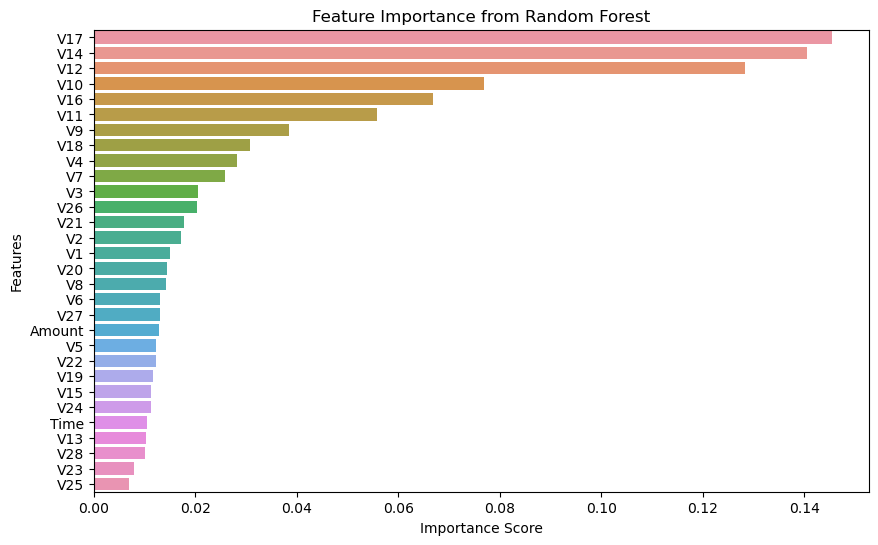

In [31]:
X = data.drop('Class', axis=1) 
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importance
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

<a id='HandlingImbalancedData'></a>

# 8-Handling Imbalanced Data⚖️

### i will apply >> Over- and Under-sampling: This involves both reducing the majority class and increasing the minority class, creating a more balanced dataset without oversampling too much or undersampling too aggressively. 

In [32]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

0    283253
Name: Class, dtype: int64
1    473
Name: Class, dtype: int64


In [33]:
X = data.drop('Class', axis=1)  
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)

In [34]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0: 198269, 1: 339})
After resampling: Counter({0: 198269, 1: 118961})


In [35]:
data = pd.DataFrame(X_resampled, columns=X.columns) #Combine the resampled X and y into a new DataFrame
data['Class'] = y_resampled 

In [36]:
data.shape    #the original data shape was (283726, 31)

(317230, 31)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

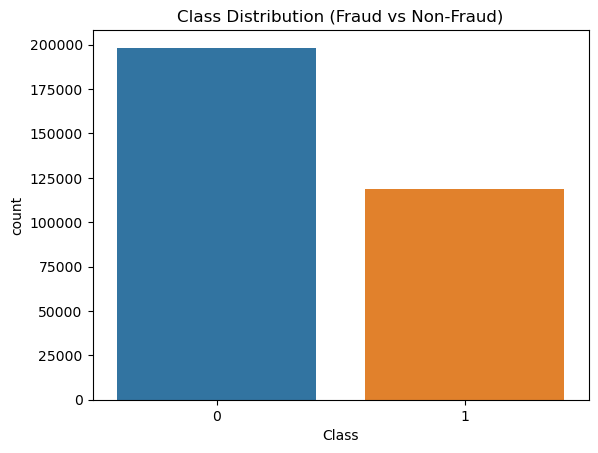

In [37]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

In [38]:
print(data.duplicated().sum()) #note that No null values will not appear in the newly generated rows,
                               #as the like SMOTE create realistic, filled-in values for all features.

0


In [39]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

0    198269
Name: Class, dtype: int64
1    118961
Name: Class, dtype: int64


### check data distribution after all changes i do in it:

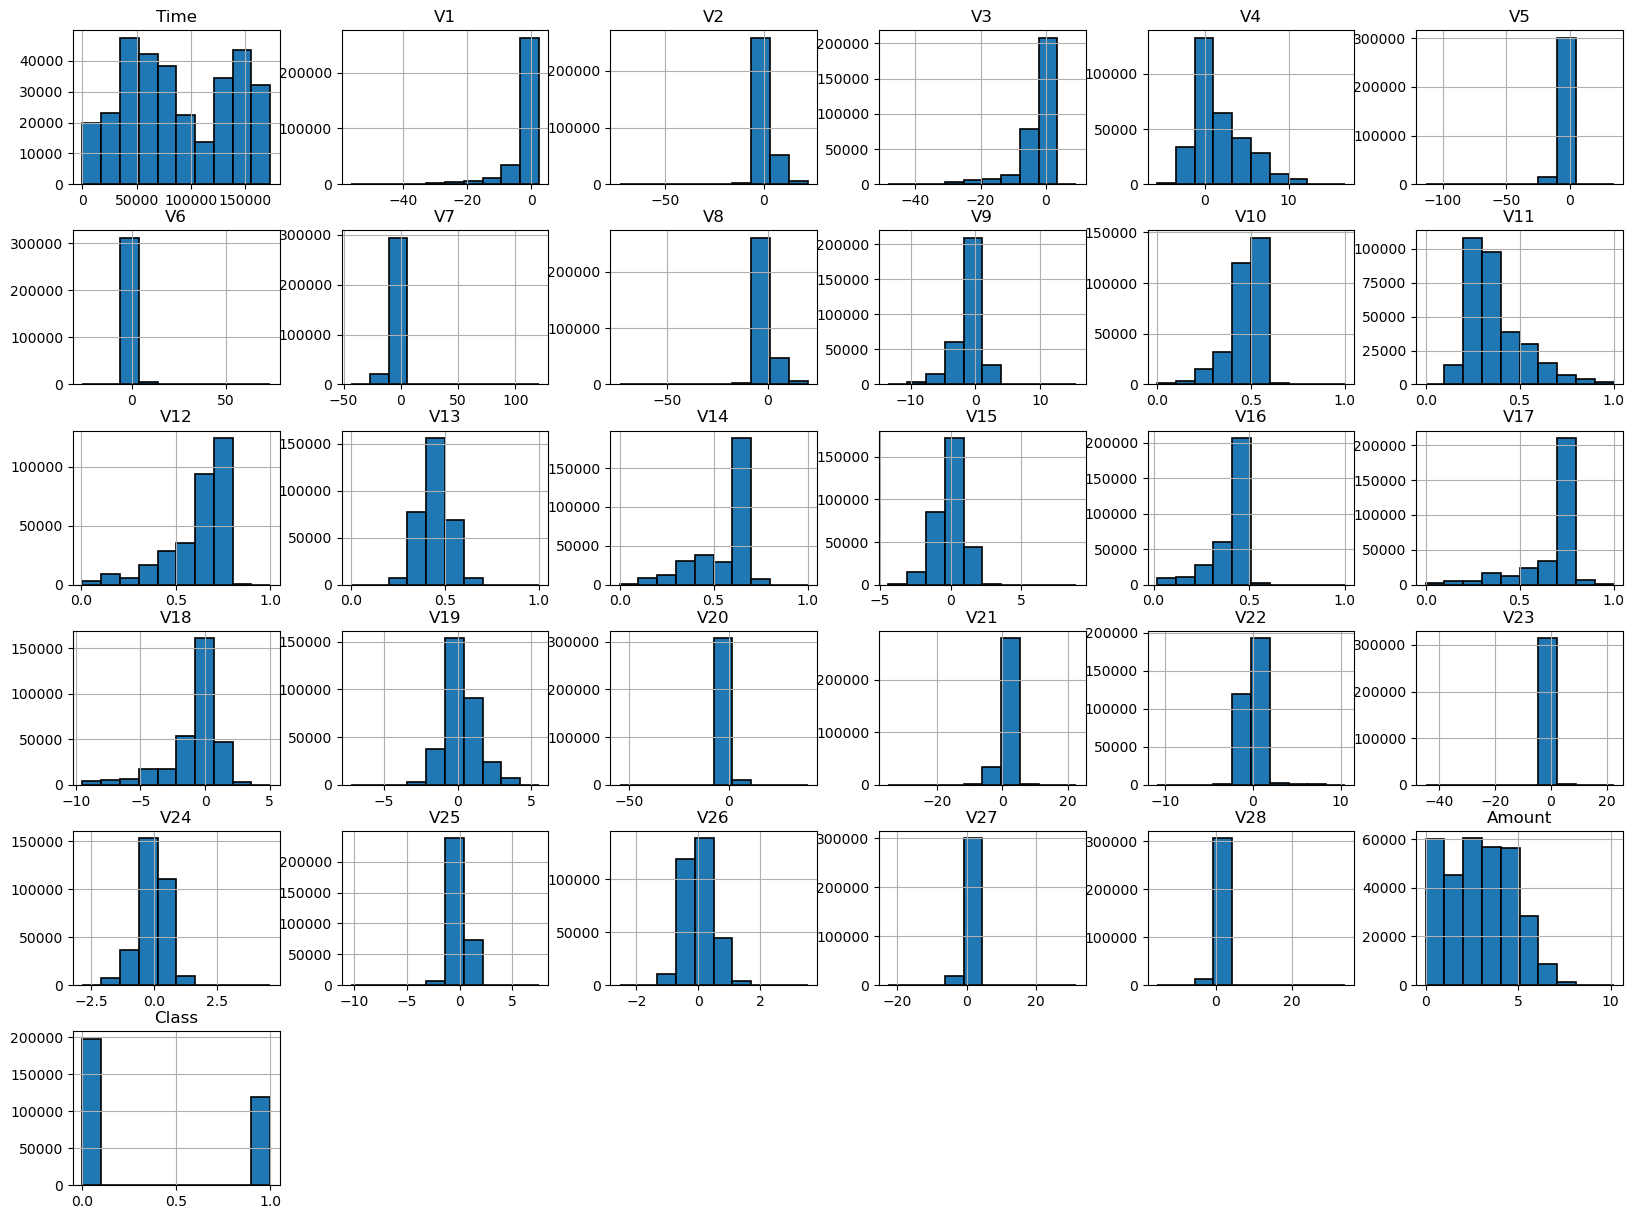

In [40]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(20,15)

## we made sure that out data is balanced and ready for modeling ✅

<a id='SplittingData'></a>

# 9-Splitting Data

In [41]:
X = data.drop('Class', axis=1)  
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id='ModelSelection'></a>

# 10- Model Selection

In [42]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=2.0,                  # Regularization strength (lower value = stronger regularization)
        solver='liblinear',    
        max_iter=1000           
    ),
    
    "KNearest": KNeighborsClassifier(
         n_neighbors=10,                    
    ),
    
    "XGB Classifier": XGBClassifier(
        max_depth=3,            # Limits the depth of the tree to reduce overfitting
        learning_rate=1,     
        n_estimators=9,      
        subsample=0.8,         
        colsample_bytree=0.8,   
        reg_lambda=1,           # L2 regularization term to prevent overfitting
        reg_alpha=0.2           # L1 regularization term
    ),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,            # Limit depth of the tree to prevent overfitting
        min_samples_split=25,  
        min_samples_leaf=15,     
        max_features='sqrt',   
        ccp_alpha=0.01          
    )
}

<a id='ModelTraining'></a>

# 11-Model Training⚙️

In [43]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}\n")

Results for LogisticRegression:
Accuracy: 0.9305
Precision: 0.9648
Recall: 0.8449
F1 Score: 0.9009

Results for KNearest:
Accuracy: 0.9225
Precision: 0.9468
Recall: 0.8398
F1 Score: 0.8901

Results for XGB Classifier:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768

Results for DecisionTreeClassifier:
Accuracy: 0.9344
Precision: 0.9399
Recall: 0.8810
F1 Score: 0.9095



# 📌Note!!!
## The MODEL OVERFITTED !
#### After i train my model the XGB Classifier and DecisionTreeClassifier caused overfit with accuracy 100% , i made sure of that by test it on unseen data and it generalize very bad! i also compare between Training data performance and Testing data performance and find Testing less than T raining .
 
 ## HOW DID I SOLVE THIS PROBLEM?
 * Regularization
 * Early stopping
 * tuning certain parameters

In [44]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Training data performance
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")
    
    # Testing data performance
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9301
Precision: 0.9626
Recall: 0.8466
F1 Score: 0.9009

Testing Results for LogisticRegression:
Accuracy: 0.9305
Precision: 0.9648
Recall: 0.8449
F1 Score: 0.9009

Training Results for KNearest:
Accuracy: 0.9368
Precision: 0.9622
Recall: 0.8657
F1 Score: 0.9114

Testing Results for KNearest:
Accuracy: 0.9225
Precision: 0.9468
Recall: 0.8398
F1 Score: 0.8901

Training Results for XGB Classifier:
Accuracy: 0.9827
Precision: 0.9836
Recall: 0.9701
F1 Score: 0.9768

Testing Results for XGB Classifier:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768

Training Results for DecisionTreeClassifier:
Accuracy: 0.9446
Precision: 0.9435
Recall: 0.9067
F1 Score: 0.9247

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9442
Precision: 0.9410
Recall: 0.9077
F1 Score: 0.9240



### we ensure that Testing Results grater or nearly to  Training Results to prevent overfit  ✅

<a id='HyperparameterTuning'></a>

# 12-Hyperparameter Tuning🛠️

#### Hyperparameter Tuning for DecisionTreeClassifier

In [47]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for DecisionTreeClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for DecisionTreeClassifier: {grid_search.best_score_:.4f}")

Best parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for DecisionTreeClassifier: 0.9958


#### Hyperparameter Tuning for LogisticRegression Classifier

In [48]:
param_grid = {
   'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear'],
        'max_iter': [100, 200]
}
clf = LogisticRegression()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for LogisticRegressionClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for LogisticRegressionClassifier: {grid_search.best_score_:.4f}")

Best parameters for LogisticRegressionClassifier: {'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegressionClassifier: 0.9601


#### Hyperparameter Tuning for KNeighbors Classifier

In [49]:
param_grid = {
   'n_neighbors': [3, 5, 7, 9, 11]
}
clf =KNeighborsClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNeighborsClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for KNeighborsClassifier: {grid_search.best_score_:.4f}")

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score for KNeighborsClassifier: 0.9266


<a id='ModelEvaluation'></a>

# 13-Model Evaluation📝

### we see now  XGB Classifier is the best model 1️⃣, let's evaluate it

Model Evaluation Metrics on Test Data:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768
Confusion Matrix:
 [[59037   540]
 [ 1100 34492]]


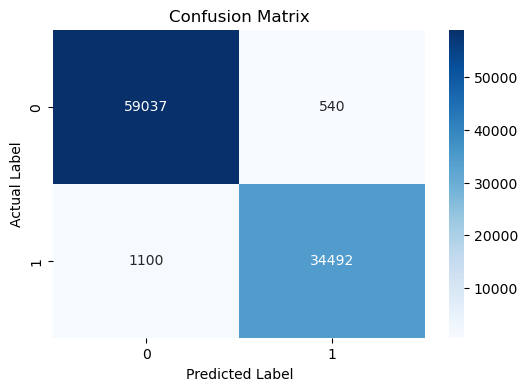

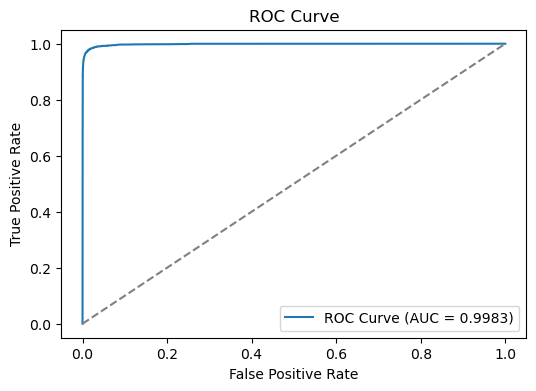

In [50]:
# Predictions using the best model
y_pred = classifiers['XGB Classifier'].predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC-AUC Curve
y_test_proba = classifiers['XGB Classifier'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()

<a id='FinalModelandDeployment'></a>

# 14- Final Model and Deployment🔖

In [51]:
import pickle
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'wb') as file:
    pickle.dump(classifiers['XGB Classifier'], file)

In [52]:
with open('Final_Credit_Card_Fraud_Detection_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

<a id='MonitorandMaintaintheModel'></a>

# 15-Monitor and Maintain the Model👀
* Monitor performance over time: Ensure the model continues to perform well on new data.
* Retrain the model periodically, especially if new data becomes available.

### END OF this Iconic Notebook💗 
### if U like it Upvote 🤙🏼